# 4. Диаграммы размаха (выбросы). Привести пример расчета на небольшом датасете.

Диаграмма размаха — это графический инструмент для визуализации распределения данных, который позволяет быстро оценить медиану, квартили, размах данных и выбросы. 

Выбросы — это значения, которые значительно отклоняются от остальных данных и могут быть вызваны ошибками измерения или аномалиями.

## Шаги для построения диаграммы размаха
1. Вычисление квартилей:
- Первый квартиль (Q1) — это медиана нижней половины данных.
- Второй квартиль (Q2) — это медиана всего набора данных.
- Третий квартиль (Q3) — это медиана верхней половины данных.

2. Вычисление межквартильного размаха (IQR):
- IQR = Q3 - Q1

3. Определение "усов":
- Нижний ус: Q1 - 1.5 * IQR
- Верхний ус: Q3 + 1.5 * IQR

4. Выявление выбросов:
- Любые значения, которые находятся за пределами "усов", считаются выбросами.

## Формула для расчета позиции квартиля

Для набора данных из n элементов позиция k-го квартиля (Qk) вычисляется по формуле:

Pk = k * (n+1)/4

где:
- k=1 для первого квартиля (Q1),
- k=2 для второго квартиля (Q2),
- k=3 для третьего квартиля (Q3).

Если Pk не является целым числом, то значение квартиля интерполируется между двумя ближайшими значениями в наборе данных.

## Пример расчета 

**Данные**:
[14, 30, 12, 13, 10, 15, 15, 16, 16, 17, 18, 20, 22, 24, 12]

#### Шаг 1: Упорядочиваем данные по возрастанию:
[10, 12, 12, 13, 14, 15, 15, 16, 16, 17, 18, 20, 22, 24, 30]

#### Шаг 2: Находим позиции квартилей
Количество элементов n = 15

- **Позиция Q1**:
  P1 = 1*(15+1)/4 = 4
  
  Q1 находится на 4-й позиции.

- **Позиция Q2 (медиана)**:
  P2 = 2*(15+1)/4 = 8
  
  Q2 находится на 8-й позиции.

- **Позиция Q3**:
  P3 = 3*(15+1)/4 = 12
  
  Q3 находится на 12-й позиции.

#### Шаг 3: Находим значения квартилей
- **Q1**: 4-й элемент в упорядоченном наборе данных:
  Q1 = 13

- **Q2 (медиана)**: 8-й элемент:
  Q2 = 16

- **Q3**: 12-й элемент:
  Q3 = 20

#### Шаг 4: Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1 = 20 - 13 = 7


### Итоговые значения:
- **Q1 (Первый квартиль)**: 13
- **Q2 (Медиана)**: 16
- **Q3 (Третий квартиль)**: 20
- **IQR (Межквартильный размах)**: 7

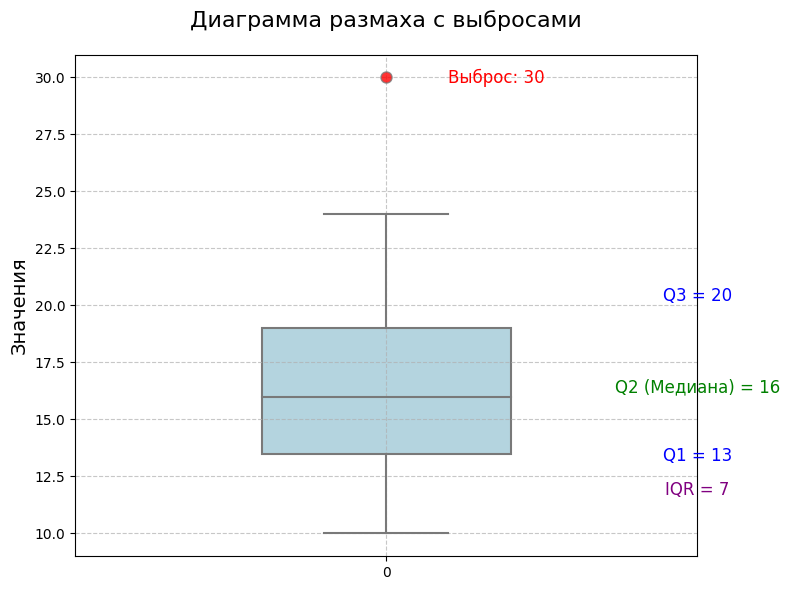

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Данные
data = [14, 30, 12, 13, 10, 15, 15, 16, 16, 17, 18, 20, 22, 24, 12]

plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=data, orient='v', color='lightblue', width=0.4, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', alpha=0.8))

# Добавление аннотаций для выбросов
outliers = [x for x in data if x < 10 or x > 24] 
for i, outlier in enumerate(outliers):
    ax.text(0.1, outlier, f'Выброс: {outlier}', fontsize=12, color='red', 
            verticalalignment='center', horizontalalignment='left')

# Добавление подписей для квартилей и IQR
q1, q2, q3 = 13, 16, 20
iqr = 7

ax.text(0.5, q1, f'Q1 = {q1}', fontsize=12, color='blue', 
        verticalalignment='bottom', horizontalalignment='center')
ax.text(0.5, q2, f'Q2 (Медиана) = {q2}', fontsize=12, color='green', 
        verticalalignment='bottom', horizontalalignment='center')
ax.text(0.5, q3, f'Q3 = {q3}', fontsize=12, color='blue', 
        verticalalignment='bottom', horizontalalignment='center')
ax.text(0.5, q1 - 0.1 * iqr, f'IQR = {iqr}', fontsize=12, color='purple', 
        verticalalignment='top', horizontalalignment='center')


plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Диаграмма размаха с выбросами", fontsize=16, pad=20)
plt.ylabel("Значения", fontsize=14)
plt.tight_layout()
plt.show()